<a href="https://colab.research.google.com/github/MateoPatinoRios/MateoPati-o/blob/main/Parcial1_1007362148.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import optimize, interpolate
import pandas as pd
df=pd.DataFrame({'día':[1,2,3,4,5,6],'IPMH':[int(464*np.random.uniform(99.8,100.2)/100),int(494*np.random.uniform(99.8,100.2)/100),int(532*np.random.uniform(99.8,100.2)/100),int(552*np.random.uniform(99.8,100.2)/100),int(576*np.random.uniform(99.8,100.2)/100),int(589*np.random.uniform(99.8,100.2)/100)]})
df

,día,IPMH
0,1,463
1,2,494
2,3,531
3,4,551
4,5,575
5,6,589


La ecuación de cinemática para un cuerpo que describe una trayectoria en caída libre es: $$y(t)=\frac{-g}{2}t^2+v_{0}t+y_{0}$$
Se va ajustar los datos anteriores a un polinomio de grado dos:

In [ ]:
P=np.polyfit(df['día'],df['IPMH'],deg=2) #Polinomio que minimiza la distancia del punto a la gráfica
P=np.poly1d(P,variable='t')
print(P)

        2
-2.446 t + 42.64 t + 421.7


Tal y cómo se manifiesta en la ecuación anterior:

In [ ]:
print(f'Velocidad inicial es: {P[1]} IPMH/día')
print(f'La aceleración constante es: {-2*P[2]} IPMH/día^2')

Velocidad inicial es: 42.63928571428609 IPMH/día
La aceleración constante es: 4.892857142857242 IPMH/día^2


**Para hallar el máximo de infectados con este ajuste se puede derivar el polinomio y hallar su raíz.**

In [ ]:
Pp=P.deriv()
Pp=np.poly1d(Pp.coef,variable='t')
print(Pp)

 
-4.893 t + 42.64


Hallando la raíz de Pp que es la derivada del polinomio de ajuste

In [ ]:
Imax=Pp.roots
print(f'La derivada del polinomio de ajuste se hace 0 en {float(Imax)} días')
print(f'Esto quiere decir que la cantidad máxima de IPMH es: {float(P(Imax))}')

La derivada del polinomio de ajuste se hace 0 en 8.714598540145886 días
Esto quiere decir que la cantidad máxima de IPMH es: 607.4921285192898


También se podría hallar dicha raíz mediante el método de la secante:

In [ ]:
Imax=optimize.newton(P.deriv(),8)
print(f'El máximo de IPMH se halla a los {Imax} días')

El máximo de IPMH se halla a los 8.714598540145886 días


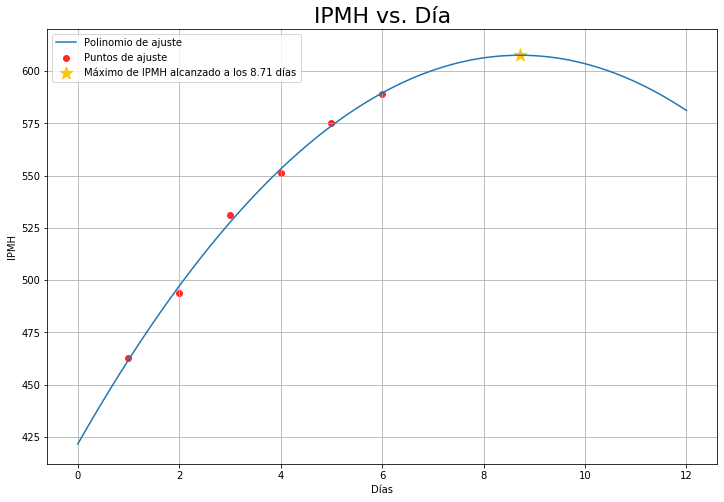

In [ ]:
import matplotlib.pylab as plt
t=np.linspace(0,12,1000)
plt.figure(figsize=(12,8))
plt.scatter(df['día'],df['IPMH'],c='#FF2929')
plt.plot(t,P(t))
plt.scatter(Imax,P(Imax),c='#FFC500',marker='*',s=(178))
plt.title('IPMH vs. Día',size=22)
plt.legend(['Polinomio de ajuste','Puntos de ajuste',f'Máximo de IPMH alcanzado a los {round(Imax,2)} días'])
plt.xlabel('Días')
plt.ylabel('IPMH')
plt.grid()